# Limpieza de bienes raíces

Este es un conjunto de datos (dataset) reales que fue descargado usando técnicas de web scraping. La data contiene registros de **Fotocasa**, el cual es uno de los sitios más populares de bienes raíces en España. Por favor no hagas esto (web scraping) a no ser que sea para propósitos académicos.

El dataset fue descargado hace algunos años por Henry Navarro y en ningún caso se obtuvo beneficio económico de ello.

Contiene miles de datos de casas reales publicadas en la web www.fotocasa.com. Tu objetivo es extraer tanta información como sea posible con el conocimiento que tienes hasta ahora de ciencia de datos, por ejemplo ¿cuál es la casa más cara en todo el dataset?

Empecemos precisamente con esa pregunta... ¡Buena suerte!

#### Ejercicio 00. Lee el dataset assets/real_estate.csv e intenta visualizar la tabla (★☆☆)

In [1]:
import pandas as pd

# Este archivo CSV contiene puntos y comas en lugar de comas como separadores
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


#### Ejercicio 01. ¿Cuál es la casa más cara en todo el dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle del Prado, Nº20 es la más cara y su precio es de 5000000 USD`

In [2]:
max_price_row = ds[ds["price"] == ds["price"].max()]
# Si hubiese mas de una casa con el precio máximo encontrado las muestro todas
# Si solo existe una se muestra solo esa
precio_casa = max_price_row["price"].iloc[0]
direccion_casa = max_price_row["address"].to_list()

if len(direccion_casa) == 1:
    print(f"La casa con dirección en {direccion_casa[0]} es la más cara y su precio es de {precio_casa} EUR")
else:
    print("Las casas con direcciones en: ")
    for i in direccion_casa:
        print(f">> {i}")
    print(f"... son las más caras y su precio es de {precio_casa}")

La casa con dirección en El Escorial es la más cara y su precio es de 8500000 EUR


#### Ejercicio 02. ¿Cuál es la casa más barata del dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle Alcalá, Nº58 es la más barata y su precio es de 12000 USD`

In [3]:
# Excluyo de mi filtro los precios de casa == 0 sin modificar el dataset
min_price_row = ds[ds["price"] != 0]
# Busco la fila que contiene la casa con precio minimo != 0
min_price_row = min_price_row[min_price_row["price"] == min_price_row["price"].min()]
# Si hubiese mas de una casa con el precio minimo encontrado las muestro todas
# Si solo existe una se muesta solo esa
direccion_casa = min_price_row["address"].to_list()
precio_casa = min_price_row["price"].iloc[0]
if len(direccion_casa) == 1:
    print(f"La casa con dirección en {direccion_casa[0]} es la más barata y su precio es de {precio_casa} EUR")
else:
    print("Las casas con direcciones en: ")
    for i in direccion_casa:
        print(f">> {i}")
    print(f"... son las más baratas y su precio es de {precio_casa}")

La casa con dirección en Berlin, Coslada es la más barata y su precio es de 600 EUR


#### Ejercicio 03. ¿Cuál es la casa más grande y la más pequeña del dataset? (★☆☆)

Imprime la dirección y el área de las casas seleccionadas. Por ejemplo:

`La casa más grande está ubicada en Calle Gran Vía, Nº38 y su superficie es de 5000 metros`

`La casa más pequeña está ubicada en Calle Mayor, Nº12 y su superficie es de 200 metros`

In [4]:
largest_house = ds[ds["surface"] == ds["surface"].max()]
largest_house_address = largest_house["address"].iloc[0]
largest_house_surface = int(largest_house["surface"].iloc[0])

smallest_house = ds[ds["surface"] == ds["surface"].min()]
smallest_house_address = smallest_house["address"].iloc[0]
smallest_house_surface = int(smallest_house["surface"].iloc[0])

print(f"La casa más grande está ubicada en {largest_house_address} y su superficie es de {largest_house_surface} metros")
print(f"La casa más pequeña está ubicada en {smallest_house_address} y su superficie es de {smallest_house_surface} metros")

La casa más grande está ubicada en Sevilla la Nueva y su superficie es de 249000 metros
La casa más pequeña está ubicada en Calle Amparo,  Madrid Capital y su superficie es de 15 metros


#### Ejercicio 04. ¿Cuantas poblaciones (columna level5) contiene el dataset? (★☆☆)

Imprime el nombre de las poblaciones separadas por coma. Por ejemplo:

`> print(populations)`

`population1, population2, population3, ...`

In [5]:
populations = ds["level5"].unique()
print(f"El dataset contiene {len(populations)} poblaciones:")
for i in populations:
    if i == populations[-1]:
        print(i, end="")
    else:
        print(i, end=", ")

El dataset contiene 168 poblaciones:
Arganda del Rey, Fuenlabrada, Boadilla del Monte, Las Rozas de Madrid,  Madrid Capital, Villaviciosa de Odón, Pinto, Valdemoro, Navalcarnero, Pozuelo de Alarcón, Torrejón de Ardoz, Navalagamella, San Sebastián de los Reyes, Rivas-vaciamadrid, Alpedrete, Móstoles, San Fernando de Henares, Coslada, Becerril de la Sierra, Alcalá de Henares, Chinchón, Parla, Alcorcón, El Escorial, Leganés, Pedrezuela, Majadahonda, Villanueva de la Cañada, Villanueva del Pardillo, Torrelodones, Moralzarzal, Mejorada del Campo, Aranjuez, Corpa, Getafe, Velilla de San Antonio, Sevilla la Nueva, San Martín de la Vega, Villalbilla, Collado Villalba, Alcobendas, El Molar (Madrid), Moraleja de Enmedio, Algete, Campo Real, Torrejón de la Calzada, Colmenar Viejo, Valdemorillo, Fuente El Saz de Jarama, Tres Cantos, Arroyomolinos (Madrid), Griñón, Paracuellos de Jarama, Guadarrama, Titulcia, Galapagar, Collado Mediano, Los Molinos, San Lorenzo de El Escorial, Loeches, San Martín d

#### Ejercicio 05. ¿El dataset contiene valores no admitidos (NAs)? (★☆☆)

Imprima un booleano (`True` o `False`) seguido de la fila/columna que contiene el NAs.

In [6]:
hay_nas = ds.isnull()
if hay_nas.any().any():
    print("El dataframe contiene valores no admitidos (NAs)")
    print("Lista de columnas que contienen NAs y cantidad:")
    columnas_con_nas = hay_nas.sum()[hay_nas.sum() > 0]
    print(columnas_con_nas)

El dataframe contiene valores no admitidos (NAs)
Lista de columnas que contienen NAs y cantidad:
realEstate_name        10
phone_realEstate      794
rooms                 353
bathrooms             345
surface              1250
description           142
level4               6643
level6              14627
level7               2277
level8               8579
zipCode             15335
customZone          15335
dtype: int64


#### Ejercicio 06. Elimina los NAs del dataset, si aplica (★★☆)

Imprima una comparación entre las dimensiones del DataFrame original versus el DataFrame después de las eliminaciones.


In [7]:
cleaned_ds = ds.copy()
for i in columnas_con_nas.index:
    if columnas_con_nas[i] > cleaned_ds.shape[0]/2:
        cleaned_ds.drop(i, inplace=True, axis=1)
print(f"Dataframe sin columnas con NAs significativas: {cleaned_ds.shape}")
print(f"Dataframe original: {ds.shape}")

Dataframe sin columnas con NAs significativas: (15335, 33)
Dataframe original: (15335, 37)


#### Ejercicio 07. ¿Cuál la media de precios en la población (columna level5) de "Arroyomolinos (Madrid)"? (★★☆)

Imprima el valor obtenido.

In [8]:
ds_arroyomolinos = ds[ds["level5"] == "Arroyomolinos (Madrid)"]
media_arroyomolinos = int(ds_arroyomolinos["price"].mean())
print(f"La media de precios en Arroyomolinos (Madrid) es de {media_arroyomolinos} Euros")

La media de precios en Arroyomolinos (Madrid) es de 294541 Euros


#### Ejercicio 08. Trazar el histograma de los precios para la población (level5 column) de "Arroyomolinos (Madrid)" y explica qué observas (★★☆)

Imprime el histograma de los precios y escribe en la celda del Markdown un breve análisis del trazado.


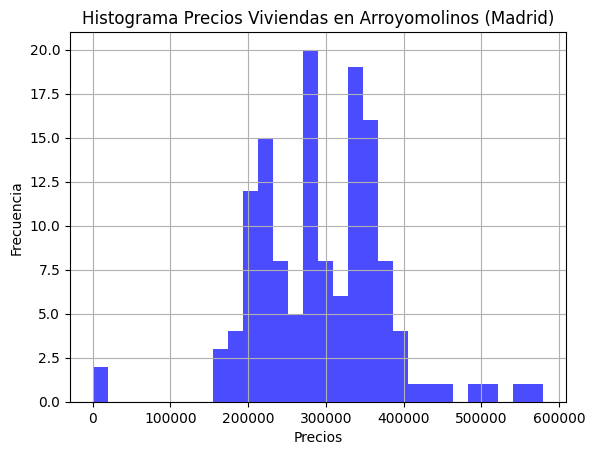

In [9]:
import matplotlib.pyplot as plt
prices_arroyomolinos = ds_arroyomolinos["price"]
plt.hist(prices_arroyomolinos, alpha=0.7, color='blue', bins=30)
plt.title('Histograma Precios Viviendas en Arroyomolinos (Madrid)')
plt.xlabel('Precios')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Según la representación de estos datos de precios de las viviendas en Arroyomolinos se puede apreciar que la gran mayoría de precios se concentran en un rango entre 150 y 400 mil Euros, siendo dentro de ellos los más frecuentes en las cercanías de 200, 300 y 350 mil Euros

#### Ejercicio 09. ¿Son los precios promedios de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios y escribe una conclusión sobre ellos.

In [10]:
ds_valdemorillo = ds[ds["level5"] == "Valdemorillo"]
promedio_valdemorillo = int(ds_valdemorillo["price"].mean())

ds_galapagar = ds[ds["level5"] == "Galapagar"]
promedio_galapagar = int(ds_galapagar["price"].mean())

print(f"Precio promedio de las viviendas en: Valdemorillo >> {promedio_valdemorillo}, Galapagar >> {promedio_galapagar}")

Precio promedio de las viviendas en: Valdemorillo >> 363860, Galapagar >> 360063


Observación: Se aprecian valores muy similares en el promedio del precio de las viviendas en Valdemorillo y Galapagar, pudiendo afirmar que son zonas muy similares a la hora de valorar el coste inmobiliario 

#### Ejercicio 10. ¿Son los promedios de precio por metro cuadrado (precio/m2) de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios de precio por metro cuadrado y escribe una conclusión sobre ellos.

Pista: Crea una nueva columna llamada `pps` (*price per square* o precio por metro cuadrado) y luego analiza los valores.

In [11]:
ds["pps"] = ds["price"] / ds["surface"]

pps_valdemorillo_mean = int(ds[ds["level5"] == "Valdemorillo"]["pps"].mean())
pps_galapagar_mean = int(ds[ds["level5"] == "Galapagar"]["pps"].mean())

print("Promedio de precio por metro cuadrado en:")
print(f"Valdemorillo: {pps_valdemorillo_mean}")
print(f"Galapagar: {pps_galapagar_mean}")

Promedio de precio por metro cuadrado en:
Valdemorillo: 1317
Galapagar: 1606


A pesar de que el precio promedio de las viviendas en Valdemorillo y Galapagar es muy similar se aprecia que el precio por metro cuadrado es superior en Galapagar, aproximadamente un 22% más que en Valdemorillo. Teniendo en cuenta los valores obtenidos previamente del precio promedio de las viviendas podemos llegar a la conclusión de que las viviendas de Valdemorillo en venta deben ser de mayor superficie para tener precios similares a las de Galapagar. A esta conclusión final podíamos haber llegado analizando los promedios de superficie de las viviendas en ambas localidades

#### Ejercicio 11. Analiza la relación entre la superficie y el precio de las casas. (★★☆)

Pista: Puedes hacer un `scatter plot` y luego escribir una conclusión al respecto.

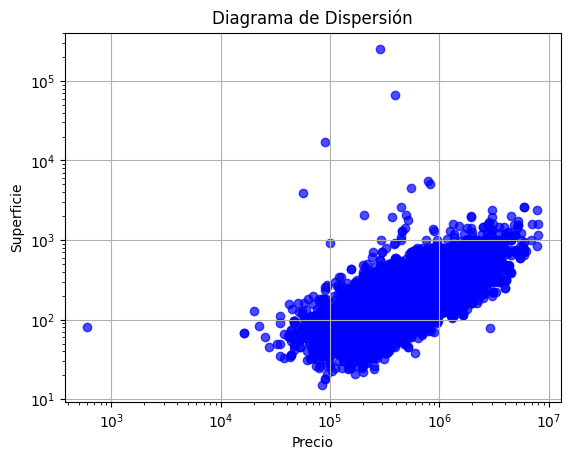

In [12]:
surface = ds["surface"]
price = ds["price"]
plt.scatter(price, surface, color='blue', alpha=0.7)
plt.title('Diagrama de Dispersión')
plt.xlabel('Precio')
plt.ylabel('Superficie')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

-Nota: Uso escala logaritmica en el gráfico para que se vea menos afectado visualmente por los valores extremos del dataset, se podría valorar analizar los datos y depurarlo de dichos valores extremos.

En general se aprecia, como es lógico, un aumento del precio al aumentar la superficie de las viviendas en venta, no de forma exponencial pero sí visible

#### Ejercicio 12. ¿Cuántas agencia de bienes raíces contiene el dataset? (★★☆)

Imprime el valor obtenido.

In [13]:
number_realstates = ds["realEstate_name"].nunique()
print(f"El dataset contiene {number_realstates} agencias de bienes raíces")

El dataset contiene 1821 agencias de bienes raíces


#### Ejercicio 13. ¿Cuál es la población (columna level5) que contiene la mayor cantidad de casas?(★★☆)

Imprima la población y el número de casas.

In [14]:
casas_por_poblacion = ds["level5"].value_counts()
maxima_poblacion = casas_por_poblacion.max()
nombre_poblacion_maxima = casas_por_poblacion.idxmax()

print(f"La población con mayor número de casas es {nombre_poblacion_maxima} con {maxima_poblacion} casas")

La población con mayor número de casas es  Madrid Capital con 6643 casas


#### Ejercicio 14. Ahora vamos a trabajar con el "cinturón sur" de Madrid. Haz un subconjunto del DataFrame original que contenga las siguientes poblaciones (columna level5): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Pista: Filtra el DataFrame original usando la columna `level5` y la función `isin`.

In [15]:
cinturon_sur = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]
data_sur = ds[ds["level5"].isin(cinturon_sur)]
data_sur

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone,pps
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN,1034.883721
85,86,153152077,False,sinergical inmobiliaria,NaN,https://www.fotocasa.es/es/comprar/vivienda/le...,1.0,1.0,50.0,107000,...,0,0,0,0,1,"40,35059","-3,82693",NaN,NaN,2140.000000
94,95,153995577,False,viviendas365com,911226014.0,https://www.fotocasa.es/es/comprar/vivienda/le...,3.0,2.0,120.0,320000,...,0,0,0,0,0,"40,31933","-3,77574",NaN,NaN,2666.666667
109,110,153586414,False,area uno asesores inmobiliarios,912664081.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,3.0,142.0,425000,...,0,0,0,0,0,"40,3313411","-3,8313868",NaN,NaN,2992.957746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15275,15276,153903887,False,aliseda servicios de gestion inmobiliaria,911368198.0,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,1.0,78.0,138000,...,0,0,0,0,1,"40,31381","-3,83733",NaN,NaN,1769.230769
15291,15292,151697757,False,unipiso,912788631.0,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,2.0,110.0,279000,...,0,0,0,0,0,"40,3259051","-3,76318",NaN,NaN,2536.363636
15305,15306,153902389,False,jadein ferrero,914871639.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,85.0,170000,...,0,0,0,0,0,"40,2882193","-3,8098617",NaN,NaN,2000.000000
15322,15323,153871864,False,gestion comercial,911220662.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,91.0,112000,...,0,0,0,0,0,"40,28282","-3,78892",NaN,NaN,1230.769231


#### Ejercicio 15. Traza un gráfico de barras de la mediana de los precios y explica lo que observas (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprima un gráfico de barras de la mediana de precios y escriba en la celda Markdown un breve análisis sobre el gráfico.

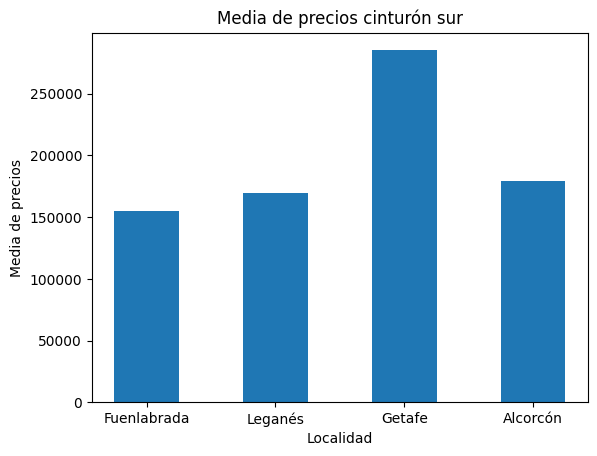

In [24]:
media_getafe = data_sur[data_sur["level5"] == "Getafe"]["price"].median()
media_leganes = data_sur[data_sur["level5"] == "Leganés"]["price"].median()
media_alcorcon = data_sur[data_sur["level5"] == "Alcorcón"]["price"].median()
media_fuenlabrada = data_sur[data_sur["level5"] == "Fuenlabrada"]["price"].median()

valores = [media_fuenlabrada, media_leganes, media_getafe, media_alcorcon]
plt.bar(cinturon_sur, valores, width=0.5)
plt.title('Media de precios cinturón sur')
plt.xlabel('Localidad')
plt.ylabel('Media de precios')
plt.show()

Se observa en el gráfico que la media mayor de precios de las viviendas es en Getafe, habiendo similitud entre los precios medios en Leganés y Alcorcón

#### Ejercicio 16. Calcula la media y la varianza de muestra para las siguientes variables: precio, habitaciones, superficie y baños (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprime ambos valores por cada variable.

In [17]:
medias_sur = [data_sur["price"].mean(), data_sur["rooms"].mean(), data_sur["surface"].mean(), data_sur["bathrooms"].mean()]
var_sur = [data_sur["price"].var(), data_sur["rooms"].var(), data_sur["surface"].var(), data_sur["bathrooms"].var()]
labels = ["Precio", "Habitaciones", "Superficie", "Baños"]

for i in range(len(labels)):
    print(f"{labels[i]}: Media: {medias_sur[i]:.2f} Varianza: {var_sur[i]:.2f}")

Precio: Media: 223094.48 Varianza: 14921367508.05
Habitaciones: Media: 3.02 Varianza: 0.72
Superficie: Media: 111.75 Varianza: 4263.05
Baños: Media: 1.63 Varianza: 0.57


#### Ejercicio 17. ¿Cuál es la casa más cara de cada población? Debes usar el subset obtenido en la pregunta 14 (★★☆)

Imprime tanto la dirección como el precio de la casa seleccionada de cada población. Puedes imprimir un DataFrame o una sola línea para cada población.

In [18]:
data_sur_fuenla = data_sur[data_sur["level5"] == "Fuenlabrada"]
mas_cara_fuenla = data_sur_fuenla.loc[data_sur_fuenla["price"].idxmax()]

data_sur_lega = data_sur[data_sur["level5"] == "Leganés"]
mas_cara_lega = data_sur_lega.loc[data_sur_lega["price"].idxmax()]

data_sur_geta = data_sur[data_sur["level5"] == "Getafe"]
mas_cara_geta = data_sur_geta.loc[data_sur_geta["price"].idxmax()]

data_sur_alco = data_sur[data_sur["level5"] == "Alcorcón"]
mas_cara_alco = data_sur_alco.loc[data_sur_alco["price"].idxmax()]

print("Casas mas caras por poblacion:")
#print(mas_cara_fuenla["address"])
print(f"Fuenlabrada: {mas_cara_fuenla['address']} {int(mas_cara_fuenla['price'])} EUR")
print(f"Leganés: {mas_cara_lega['address']} {int(mas_cara_lega['price'])} EUR")
print(f"Getafe: {mas_cara_geta['address']} {int(mas_cara_geta['price'])} EUR")
print(f"Alcorcón: {mas_cara_alco['address']} {int(mas_cara_alco['price'])} EUR")

Casas mas caras por poblacion:
Fuenlabrada: Calle de Paulo Freire, 5, Fuenlabrada 490000 EUR
Leganés: Avenida Reina Sofía, Leganés 650000 EUR
Getafe: Getafe 1050000 EUR
Alcorcón: Alcorcón 950000 EUR


#### Ejercicio 18. Normaliza la variable de precios para cada población y traza los 4 histogramas en el mismo gráfico (debes usar el subconjunto obtenido en la pregunta 14) (★★★)

Para el método de normalización, puedes usar el que consideres adecuado, no hay una única respuesta correcta para esta pregunta. Imprime el gráfico y escribe en la celda de Markdown un breve análisis sobre el gráfico.

Pista: Puedes ayudarte revisando la demostración multihist de Matplotlib.

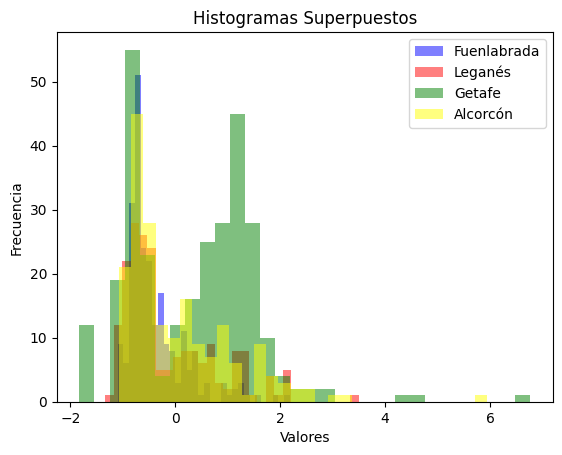

In [19]:
data_sur = data_sur.copy()
data_sur["Precios Normalizados"] = (data_sur['price'] - data_sur['price'].mean()) / data_sur['price'].std()
# data_sur["Precios Normalizados"] = (data_sur['price'] - data_sur['price'].min()) / (data_sur['price'].max() - data_sur['price'].min())

plt.hist(data_sur[data_sur["level5"] == "Fuenlabrada"]["Precios Normalizados"], bins=30, alpha=0.5, label='Fuenlabrada', color='blue')
plt.hist(data_sur[data_sur["level5"] == "Leganés"]["Precios Normalizados"], bins=30, alpha=0.5, label='Leganés', color='red')
plt.hist(data_sur[data_sur["level5"] == "Getafe"]["Precios Normalizados"], bins=30, alpha=0.5, label='Getafe', color='green')
plt.hist(data_sur[data_sur["level5"] == "Alcorcón"]["Precios Normalizados"], bins=30, alpha=0.5, label='Alcorcón', color='yellow')
plt.title('Histogramas Superpuestos')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.legend()

# Mostrar el gráfico
plt.show()

En este gráfico tenemos los datos normalizados de los precios por población en el cinturón sur usando el método de estandarización, se aprecia una concentración superior al 50 % de los precios en torno al rango -1 ... 1 y picos similares entorno a 1 desviación estandar para las 4 poblaciones

#### Ejercicio 19. ¿Qué puedes decir sobre el precio por metro cuadrado (precio/m2) entre los municipios de 'Getafe' y 'Alcorcón'? Debes usar el subconjunto obtenido en la pregunta 14 (★★☆)

Pista: Crea una nueva columna llamada `pps` (price per square en inglés) y luego analiza los valores

In [20]:

media_pps_getafe = data_sur[data_sur["level5"] == "Getafe"]["pps"].mean()
media_pps_alcorcon = data_sur[data_sur["level5"] == "Alcorcón"]["pps"].mean()
print(f"Media precio por metro cuadrado en Getafe: {int(media_pps_getafe)}")
print(f"Media precio por metro cuadrado en Alcorcón: {int(media_pps_alcorcon)}")
# De los datos obtenidos al analizar los precios/m2 tenemos que en Alcorcón y Getafe son similares, con algo más de valor en Alcorcón

Media precio por metro cuadrado en Getafe: 2066
Media precio por metro cuadrado en Alcorcón: 2239


#### Ejercicio 20. Realiza el mismo gráfico para 4 poblaciones diferentes (columna level5) y colócalos en el mismo gráfico. Debes usar el subconjunto obtenido en la pregunta 14 (★★☆) 
Pista: Haz un diagrama de dispersión de cada población usando subgráficos (subplots).

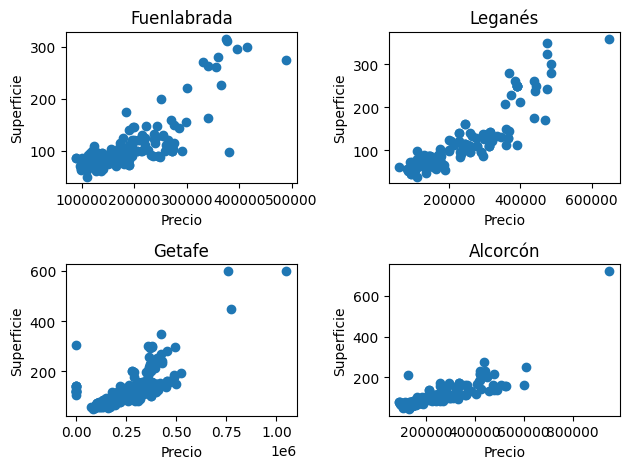

In [21]:
fig, axs = plt.subplots(2,2)

axs[0,0].scatter(data_sur[data_sur["level5"] == "Fuenlabrada"]["price"], data_sur[data_sur["level5"] == "Fuenlabrada"]["surface"])
axs[0,0].set_title('Fuenlabrada')
axs[0,0].set_xlabel("Precio")
axs[0,0].set_ylabel("Superficie")

axs[0,1].scatter(data_sur[data_sur["level5"] == "Leganés"]["price"], data_sur[data_sur["level5"] == "Leganés"]["surface"])
axs[0,1].set_title('Leganés')
axs[0,1].set_xlabel("Precio")
axs[0,1].set_ylabel("Superficie")

axs[1,0].scatter(data_sur[data_sur["level5"] == "Getafe"]["price"], data_sur[data_sur["level5"] == "Getafe"]["surface"])
axs[1,0].set_title('Getafe')
axs[1,0].set_xlabel("Precio")
axs[1,0].set_ylabel("Superficie")

axs[1,1].scatter(data_sur[data_sur["level5"] == "Alcorcón"]["price"], data_sur[data_sur["level5"] == "Alcorcón"]["surface"])
axs[1,1].set_title('Alcorcón')
axs[1,1].set_xlabel("Precio")
axs[1,1].set_ylabel("Superficie")

plt.tight_layout()


plt.show()

#### Ejercicio 21. Realiza un trazado de las coordenadas (columnas latitud y longitud) del cinturón sur de Madrid por color de cada población (debes usar el subconjunto obtenido del Ejercicio 14) (★★★★)

Ejecuta la siguiente celda y luego comienza a codear en la siguiente. Debes implementar un código simple que transforme las columnas de coordenadas en un diccionario de Python (agrega más información si es necesario) y agrégala al mapa.

In [22]:
from ipyleaflet import Map, basemaps, Marker, Popup, AwesomeIcon
from ipywidgets import HTML

# Map centered on (40.4168 degrees latitude and -3.7038 degrees longitude)
# Latitude, longitude
map = Map(center = (40.4168, -3.7038), zoom = 10, min_zoom = 1, max_zoom = 20, basemap=basemaps.OpenStreetMap.Mapnik)

In [23]:
## Aquí: traza la coordenadas de los estados

# ## PON TU CÓDIGO AQUÍ:
for x, row in data_sur.iterrows():
    lat = float(row['latitude'].replace(",", "."))
    lon = float(row['longitude'].replace(",", "."))
    if lat != 0:
        if row["level5"] == "Getafe":
            icon = AwesomeIcon(name='info-sign', marker_color='red')
        elif row["level5"] == "Fuenlabrada":
            icon = AwesomeIcon(name='info-sign', marker_color='blue')
        elif row["level5"] == "Alcorcón":
            icon = AwesomeIcon(name='info-sign', marker_color='green')
        elif row["level5"] == "Leganés":
            icon = AwesomeIcon(name='info-sign', marker_color='purple')
        marker = Marker(location=(lat, lon), icon=icon, draggable=False)

        popup_content = HTML(str(row["price"]))
        popup = Popup(location=(lat, lon), child=popup_content, close_button=True)

        marker.popup = popup
        map.add_layer(marker)
map


Map(center=[40.4168, -3.7038], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…